In [1]:
import cv2
import tensorflow as tf
import numpy as np

In [2]:
import pathlib
import os

In [4]:
!git clone https://github.com/tensorflow/models.git
!pip install --no-deps tensorflow-object-detection-api

Cloning into 'models'...
remote: Enumerating objects: 90405, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 90405 (delta 94), reused 149 (delta 68), pack-reused 90211
Receiving objects: 100% (90405/90405), 608.46 MiB | 15.93 MiB/s, done.
Resolving deltas: 100% (65119/65119), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844486 sha256=c50c1f1ed72f07be7c0eeaba8fee1aa29361026767fd5e171d349bab6f5852c7
  Stored in directory: /root/.cache/pip/wheels/8a/55/68/c084bc2cd93c41fd8f7e2ef9e6bbcb2c35a3e4b49e42044d02
Successfully built tensorflow-object-detection-api


In [5]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils


In [ ]:
print(tf.__version__)

2.15.0


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
model = tf.saved_model.load('/content/drive/MyDrive/Models/golf-ssd-640/inference/model-3-28k-steps/saved_model')

In [9]:
detect_fn = model.signatures['serving_default']

In [10]:
def detect_image(image):
    image_np = np.array(image)
    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = input_tensor[tf.newaxis, ...]

    detections = detect_fn(input_tensor)
    return detections

In [34]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from object_detection.utils import visualization_utils as viz_utils
%matplotlib inline


def detect_image(image, detect_fn, category_index):
    # Convert the image to a numpy array
    image_np = np.array(Image.open(image).convert('RGB'))
    # Convert image to tensor
    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = input_tensor[tf.newaxis, ...]

    # Perform detection
    detections = detect_fn(input_tensor)

    # Process the detection
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # Detection classes should be ints
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    # Set min_score_thresh and other visualization parameters as needed
    min_score_thresh = 0.4

    # Visualize the detection results on the image
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np,
        detections['detection_boxes'],
        detections['detection_classes'],
        detections['detection_scores'],
        category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=200,
        min_score_thresh=min_score_thresh,
        agnostic_mode=False)

    # Return the image with annotations
    return image_np

In [14]:
# label creation doesnt work because new TF is not backwards compatible with this API
# To get around, just make it ourselves
category_index = {
    1: {'id': 1, 'name': 'golf club-head'},
    2: {'id': 2, 'name': 'golf club-handle'},
    3: {'id': 3, 'name': 'golf ball'}
}

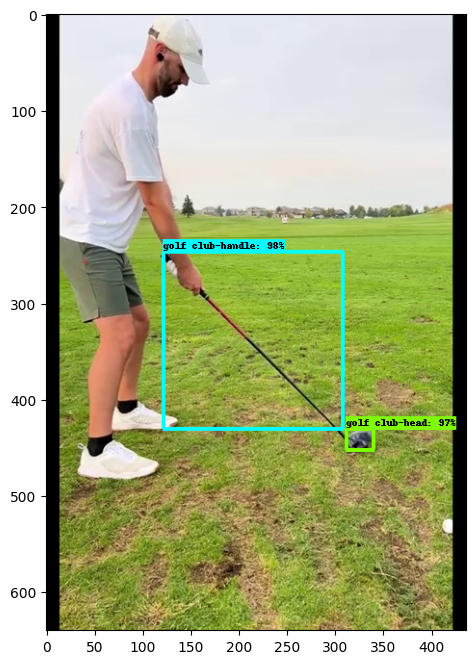

In [36]:
image = '/content/am driver 24 (1)_frame14.jpg'
annotated_image = detect_image(image, detect_fn, category_index)

# Display the image using Matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(annotated_image)
plt.show()